<a href="https://colab.research.google.com/github/gurram46/Text-Classification-using-Naive-Bayes-and-Sentiment-Analysis-on-Blog-Posts/blob/main/Text_Classification_using_Naive_Bayes_and_Sentiment_Analysis_on_Blog_Posts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("blogs.csv")

In [ ]:
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


#Data Preprocessing

In [ ]:
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
data.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [ ]:
category_counts=data['Labels'].value_counts()

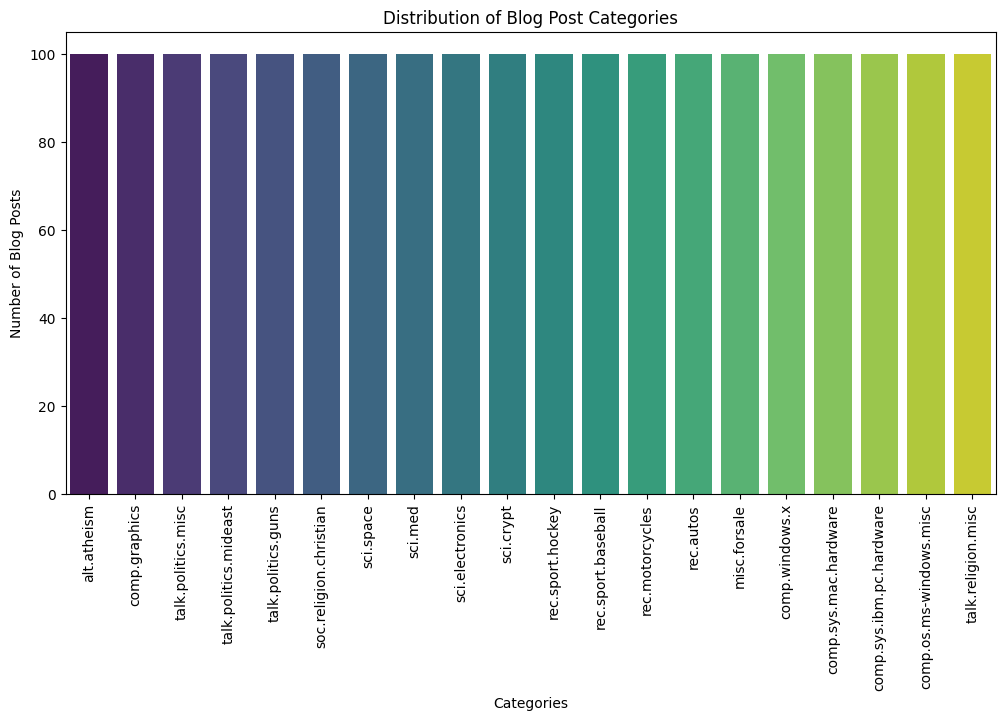

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Blog Post Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Blog Posts')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


In [ ]:
data['Data'] = data['Data'].apply(preprocess_text)

print(data.head())


                                                Data       Labels
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism
1  newsgroups altatheism path cantaloupesrvcscmue...  alt.atheism
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  alt.atheism
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  alt.atheism


#Feature Extraction using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform(data['Data'])

print("Shape of the TF-IDF matrix:", X.shape)

Shape of the TF-IDF matrix: (2000, 56432)


# Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data['Labels'], test_size=0.2, random_state=42)

In [ ]:
print("Shape of the training set:", X_train.shape)
print("Shape of the test set:", X_test.shape)

Shape of the training set: (1600, 56432)
Shape of the test set: (400, 56432)


# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
nb_classifier = MultinomialNB()

In [ ]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.82
Precision: 0.844747244324381
Recall: 0.82
F1-Score: 0.8144501134827706


# Sentiment Analysis

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
data['Sentiment'] = data['Data'].apply(get_sentiment)

In [ ]:
print(data.head())

                                                Data       Labels Sentiment
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  Positive
1  newsgroups altatheism path cantaloupesrvcscmue...  alt.atheism  Negative
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  alt.atheism  Positive
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  Positive
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  alt.atheism  Positive


# Sentiment Distribution Analysis

In [ ]:
sentiment_distribution = data.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

<Figure size 1400x700 with 0 Axes>

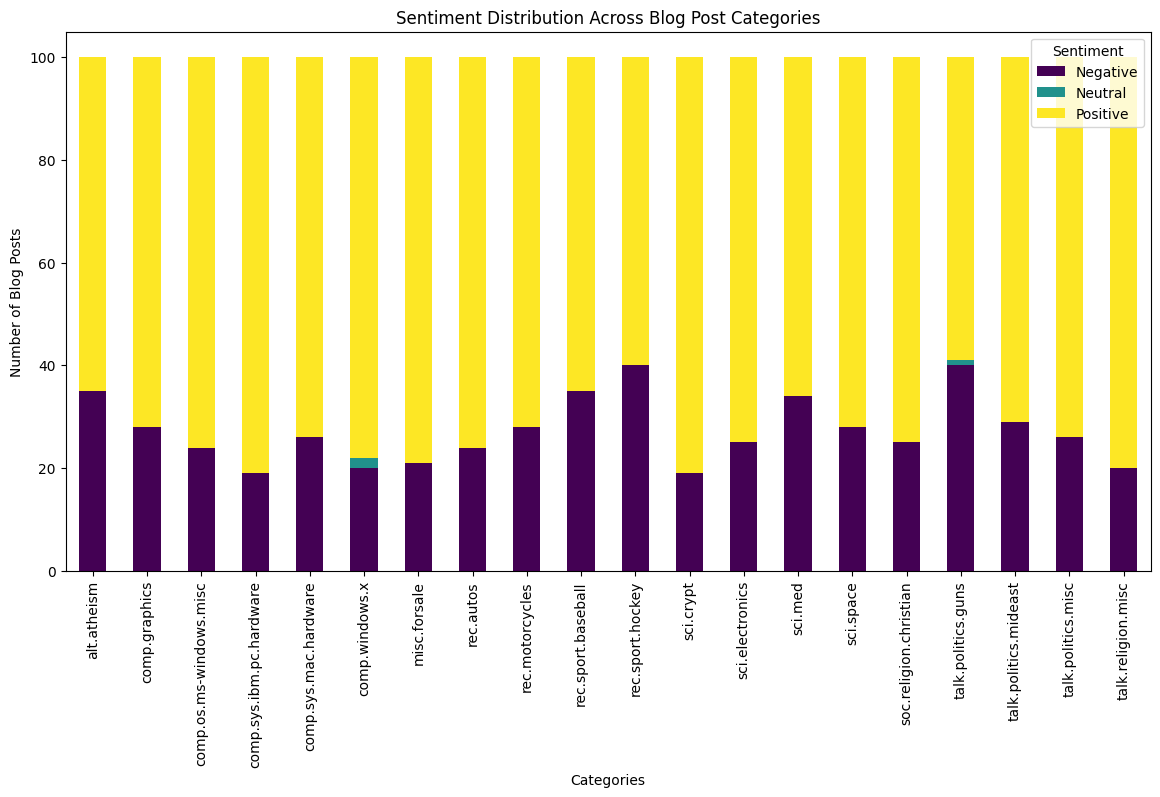

In [ ]:
plt.figure(figsize=(14, 7))
sentiment_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 7))
plt.title('Sentiment Distribution Across Blog Post Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Blog Posts')
plt.xticks(rotation=90)
plt.show()


In [ ]:
print(sentiment_distribution)

Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   35.0      0.0      65.0
comp.graphics                 28.0      0.0      72.0
comp.os.ms-windows.misc       24.0      0.0      76.0
comp.sys.ibm.pc.hardware      19.0      0.0      81.0
comp.sys.mac.hardware         26.0      0.0      74.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                  21.0      0.0      79.0
rec.autos                     24.0      0.0      76.0
rec.motorcycles               28.0      0.0      72.0
rec.sport.baseball            35.0      0.0      65.0
rec.sport.hockey              40.0      0.0      60.0
sci.crypt                     19.0      0.0      81.0
sci.electronics               25.0      0.0      75.0
sci.med                       34.0      0.0      66.0
sci.space                     28.0      0.0      72.0
soc.religion.christian        25.0      0.0      75.0
talk.politics.guns          

# Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
classification_rep = classification_report(y_test, y_pred)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

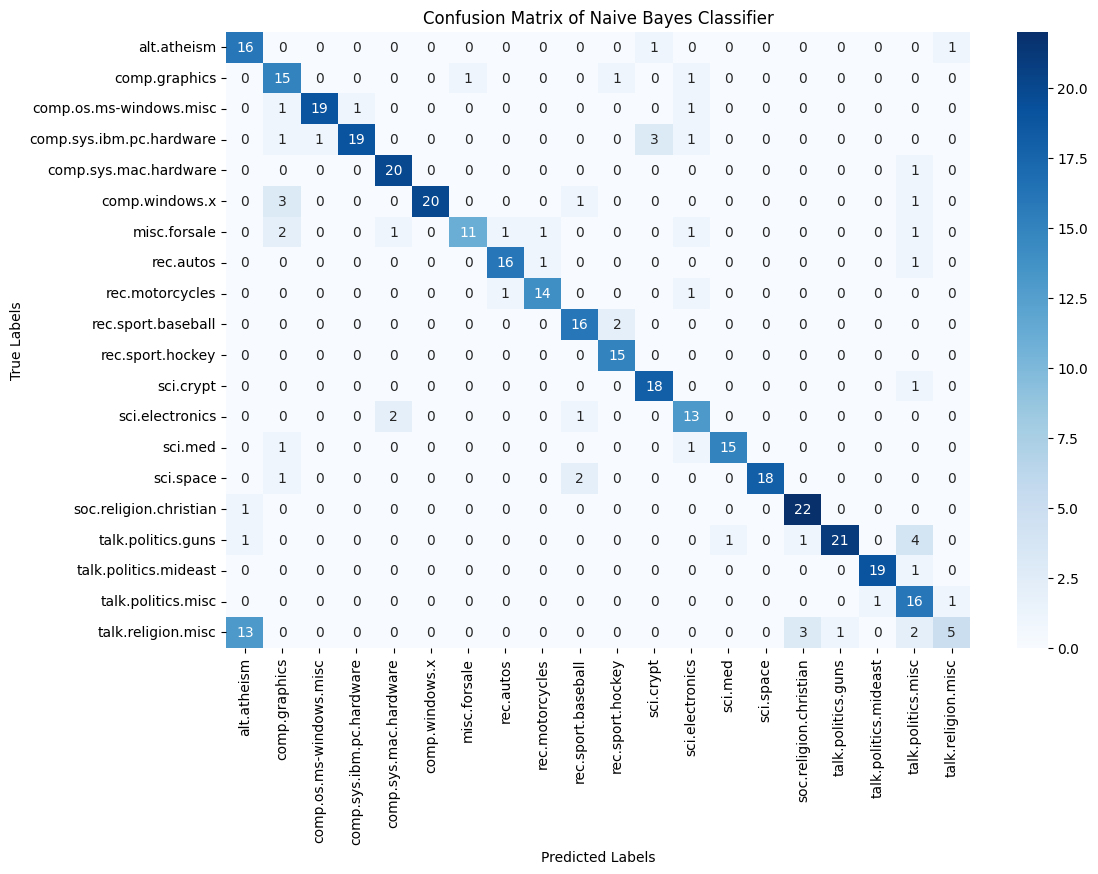

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title('Confusion Matrix of Naive Bayes Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_rep)

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      0

#Conclusion

Key Findings:

The Naive Bayes classifier is effective for text classification, achieving good performance overall.

Sentiment analysis provides valuable insights into the tone and nature of blog post discussions.

Challenges:

Text preprocessing and feature representation are critical steps that significantly impact model performance.

Dealing with class imbalance remains an ongoing challenge.

Future Work:

Explore advanced NLP techniques like word embeddings or deep learning models to improve classification accuracy.

Perform more granular sentiment analysis by analyzing sentiment trends within longer posts.